<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/Classification_DecisionTree_SMOTEoversampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree -

The decision tree Algorithm belongs to the family of supervised machine learning algorithms. It can be used for both a classification problem as well as for regression problem.Entropy controls how a Decision Tree decides to split the data. It affects how a Decision Tree draws its boundaries.

The maximum value for entropy is 1 whereas the maximum value for Gini impurity is 0.5. As the Gini Impurity does not contain any logarithmic function to calculate it takes less computational time as compared to entropy.

-Feature values are preferred to be categorical, if the values continue then they are converted to discrete before building the model.

-Based on attribute values records are distributed recursively.

-We use a statistical method for ordering attributes as a root node or the internal node.

In [20]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter


In [5]:
df = pd.read_csv('/content/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


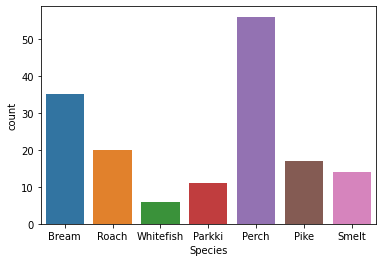

In [7]:
sns.countplot(data=df,x='Species')

Conclusion :

        Unbalanaced information for different classes.

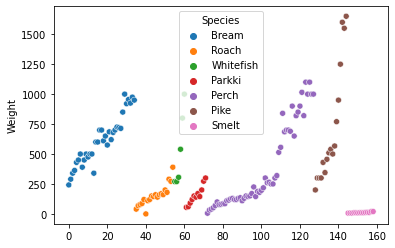

In [8]:
sns.scatterplot(data=df,x=df.index,y='Weight',hue='Species')

##Fit model and Predict classes

In [9]:
x=df.drop(columns='Species')
y=df['Species']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.6,random_state=0)

In [10]:
#Bulid model and fit

model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy Score : 0.71875
Classification Report :               precision    recall  f1-score   support

       Bream       0.95      1.00      0.98        20
      Parkki       1.00      0.50      0.67         8
       Perch       0.77      0.66      0.71        35
        Pike       1.00      1.00      1.00        11
       Roach       0.25      0.45      0.32        11
       Smelt       1.00      0.75      0.86         8
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.72        96
   macro avg       0.71      0.62      0.65        96
weighted avg       0.79      0.72      0.74        96



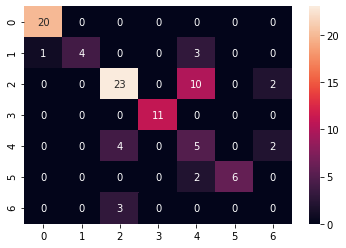

In [11]:
print("Accuracy Score :",accuracy_score(ytest,ypred))
print("Classification Report :",classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

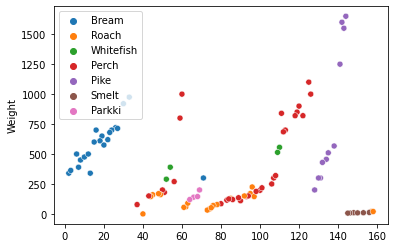

In [12]:
sns.scatterplot(data=xtest,x=xtest.index,y=xtest['Weight'],hue=ypred)

## Oversampling using SMOTE - multiclass balancing

Class=Bream, n=56 (14.285714285714285.3f%%)
Class=Roach, n=56 (14.285714285714285.3f%%)
Class=Whitefish, n=56 (14.285714285714285.3f%%)
Class=Parkki, n=56 (14.285714285714285.3f%%)
Class=Perch, n=56 (14.285714285714285.3f%%)
Class=Pike, n=56 (14.285714285714285.3f%%)
Class=Smelt, n=56 (14.285714285714285.3f%%)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

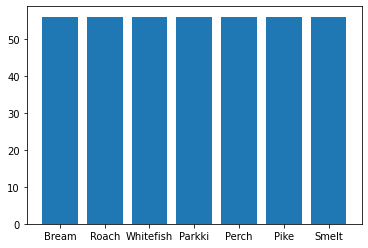

In [13]:
oversample = SMOTE()
X, y = oversample.fit_resample(x, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class={}, n={} ({}.3f%%)'.format(k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [14]:
#Bulid model and fit

model=DecisionTreeClassifier()
model.fit(X,y)
ypred=model.predict(xtest)

Accuracy Score : 1.0
Classification Report :               precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        20
      Parkki       1.00      1.00      1.00         8
       Perch       1.00      1.00      1.00        35
        Pike       1.00      1.00      1.00        11
       Roach       1.00      1.00      1.00        11
       Smelt       1.00      1.00      1.00         8
   Whitefish       1.00      1.00      1.00         3

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



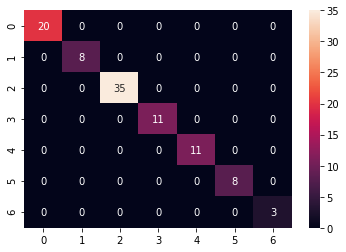

In [15]:
print("Accuracy Score :",accuracy_score(ytest,ypred))
print("Classification Report :",classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

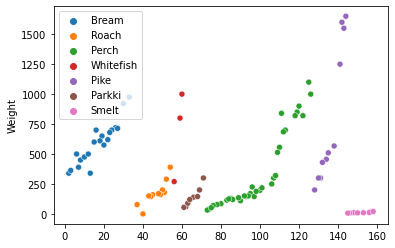

In [16]:
sns.scatterplot(data=xtest,x=xtest.index,y=xtest['Weight'],hue=ypred)

## Tunning Hyperparameters 

In [28]:
#help(DecisionTreeClassifier)
#estimators
model=DecisionTreeClassifier()

#params
params={"criterion":["gini", "entropy"],
        "splitter":["best", "random"],
        "max_features":["auto", "sqrt", "log2"]}

#cross validator
kfold=RepeatedStratifiedKFold(n_splits=5, n_repeats=10,random_state=1)

In [29]:
grid_cv=GridSearchCV(estimator=model,param_grid=params,cv=kfold,scoring='accuracy')
result=grid_cv.fit(X,y)

In [30]:
print(result.best_score_)
print(result.best_params_)

0.86963323596235
{'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'random'}


In [32]:
#Bulid model and fit

model=DecisionTreeClassifier(criterion= 'gini', max_features= 'sqrt', splitter= 'random')
model.fit(X,y)
ypred=model.predict(xtest)

Accuracy Score : 1.0
Classification Report :               precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        20
      Parkki       1.00      1.00      1.00         8
       Perch       1.00      1.00      1.00        35
        Pike       1.00      1.00      1.00        11
       Roach       1.00      1.00      1.00        11
       Smelt       1.00      1.00      1.00         8
   Whitefish       1.00      1.00      1.00         3

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



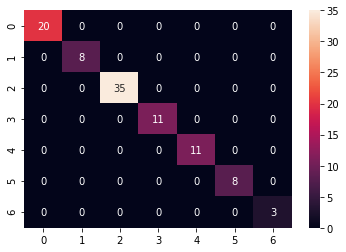

In [33]:
print("Accuracy Score :",accuracy_score(ytest,ypred))
print("Classification Report :",classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

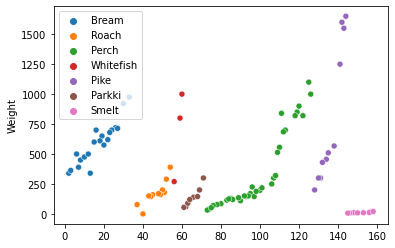

In [34]:
sns.scatterplot(data=xtest,x=xtest.index,y=xtest['Weight'],hue=ypred)